In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 讀取 DataFrame
df_A1 = gpd.read_file('rawdata/traffic-accident-A1.shp')

In [3]:
df_A1

,danger_val,geometry
0,10,POINT (185411.170 2493609.470)
1,11,POINT (300946.850 2761179.252)
2,11,POINT (219108.398 2678984.678)
3,11,POINT (219108.398 2678984.678)
4,22,POINT (207369.992 2681923.589)
...,...,...
2757,10,POINT (254623.203 2509647.134)
2758,11,POINT (222455.520 2516490.941)
2759,10,POINT (177885.054 2513816.406)
2760,10,POINT (289595.033 2781713.964)


<Axes: >

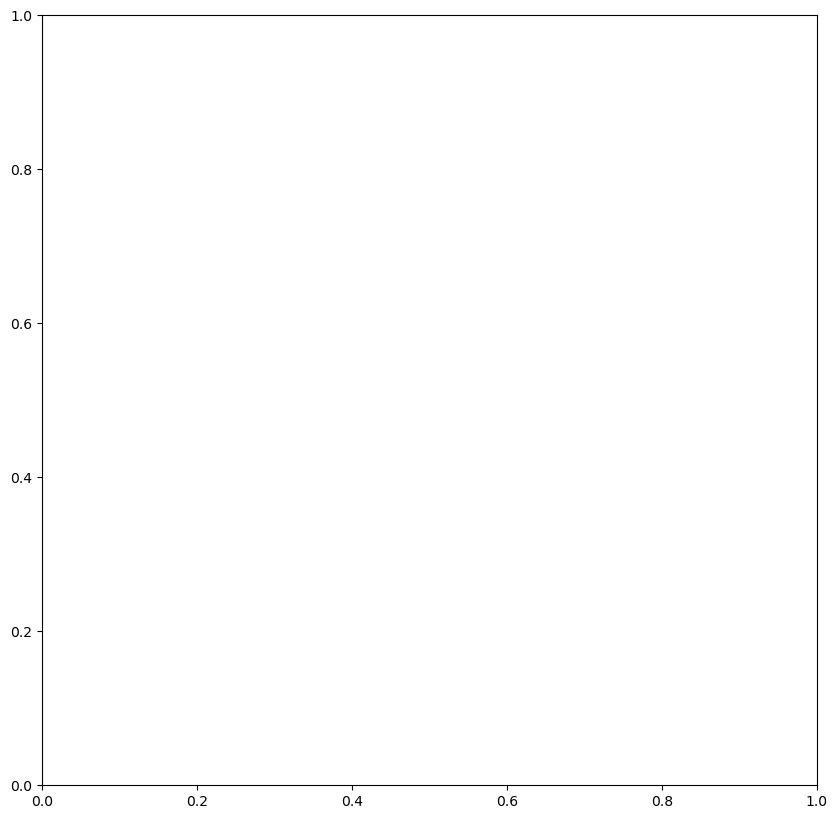

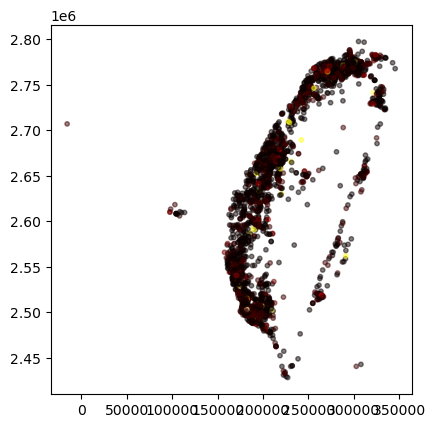

In [4]:
# 創建熱點圖
fig, ax = plt.subplots(figsize=(10, 10))
df_A1.plot(column='danger_val', cmap='hot', markersize=10, alpha=0.5)

In [5]:
df_A1['lng'] = df_A1['geometry'].x
df_A1['lat'] = df_A1['geometry'].y

In [6]:
df_A1

,danger_val,geometry,lng,lat
0,10,POINT (185411.170 2493609.470),185411.170250,2.493609e+06
1,11,POINT (300946.850 2761179.252),300946.850171,2.761179e+06
2,11,POINT (219108.398 2678984.678),219108.398045,2.678985e+06
3,11,POINT (219108.398 2678984.678),219108.398045,2.678985e+06
4,22,POINT (207369.992 2681923.589),207369.992347,2.681924e+06
...,...,...,...,...
2757,10,POINT (254623.203 2509647.134),254623.202994,2.509647e+06
2758,11,POINT (222455.520 2516490.941),222455.519917,2.516491e+06
2759,10,POINT (177885.054 2513816.406),177885.054500,2.513816e+06
2760,10,POINT (289595.033 2781713.964),289595.032939,2.781714e+06


In [7]:
df_A1['lat'].max()


2797736.1540793767

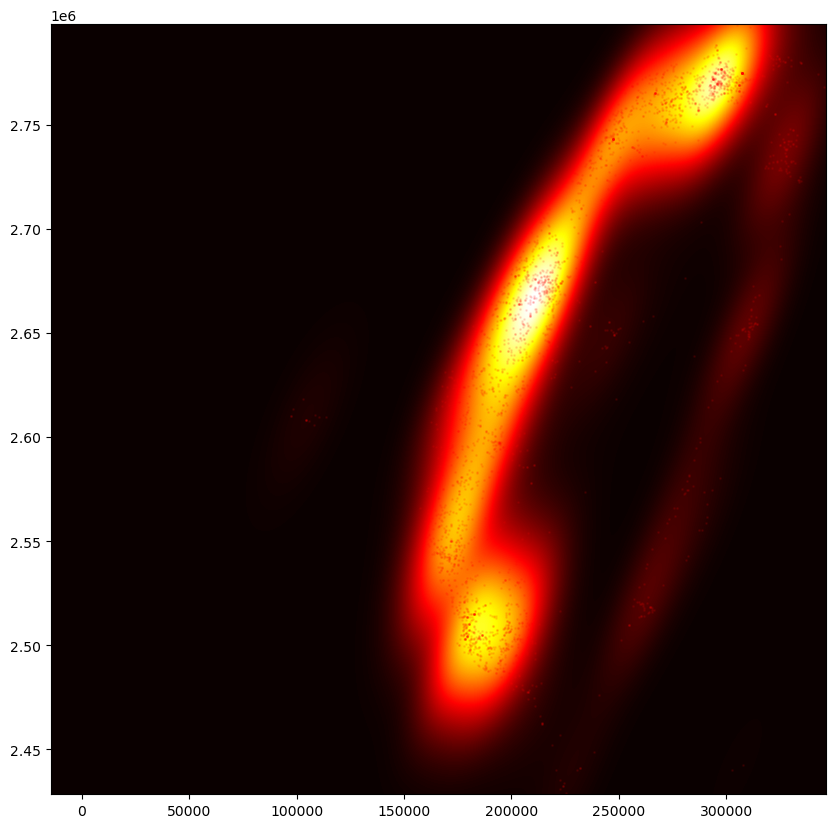

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from shapely.geometry import MultiPoint
import numpy as np

x = df_A1['lng']
y = df_A1['lat']

# 計算事故點的核密度估計
kde = gaussian_kde([x, y])


# 創建熱點圖
fig, ax = plt.subplots(figsize=(10, 10))
xmin, xmax = df_A1['lng'].min()+1000, df_A1['lng'].max()+1000
ymin, ymax = df_A1['lat'].min()+400, df_A1['lat'].max()+400
X, Y = np.mgrid[xmin:xmax:1000j, ymin:ymax:1000j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(positions).T, X.shape)
ax.scatter(x, y, c='red', s=1, alpha=0.1)
ax.imshow(np.rot90(Z), cmap='hot', extent=[xmin, xmax, ymin, ymax], aspect='auto')
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

# 秀出圖形
plt.show()

In [45]:
import rasterio
from rasterio.transform import from_origin

x_resolution = 10
y_resolution = 10

# 計算熱點圖的格點數量
width = int((xmax - xmin) / x_resolution)
height = int((ymax - ymin) / y_resolution)

# 建立熱點圖的網格
X, Y = np.mgrid[xmin:xmax:width*1j, ymin:ymax:height*1j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(positions).T, X.shape)

# 建立 TIFF 檔案
transform = from_origin(xmin, ymax, x_resolution, y_resolution)
with rasterio.open('heatmap.tif', 'w', driver='GTiff', width=width, height=height, count=1, dtype=rasterio.float32,
                   crs='EPSG:3826', transform=transform) as dst:
    dst.write(Z, 1)

: 

: 